# SPMpy_quickstart_v0.1 (2025-12-30)

This notebook is the **standard entry gate** for STMers in STM group at CNMS, ORNL.

**Scope (v0.1):**
- Environment / library sanity checks
- Select local data folder
- Prepare for loading Nanonis `.sxm` topography (next cells will call `spmpy.io` loaders)

> Note: The content below is copied from the internal demonstration notebook and will be refined as `spmpy.io.img2xr_sxm` becomes available.

# SPMpy 

# for Scanning Tunneling Microscopy and Spectroscopy Data Analysis 
* Authors : Dr. Jewook Park, CNMS, ORNL
    * Center for Nanophase Materials Sciences (CNMS), Oak Ridge National Laboratory (ORNL)
    * email :  parkj1@ornl.gov

## SPMpy

* **SPMpy** is an open-source collection of Python functions for analyzing multidimensional scanning probe microscopy (SPM) data, including **STM/S** and **AFM**.  
    *It leverages advances in computer vision and the scientific Python ecosystem for efficient data processing and visualization, inspired by tools such as [Wsxm](http://www.wsxm.eu/), [Gwyddion](http://gwyddion.net/), and [*Fundamentals in Data Visualization*](https://clauswilke.com/dataviz/).  

* SPMpy is led by **Jewook Park** ([SPMpy](https://github.com/jewook-park/SPMpy)).  
    * Contributions, suggestions, and feedback are welcome in both Korean and English via [GitHub](https://github.com/jewook-park/SPMpy) or [email](mailto:parkj1@ornl.gov).  

---

### Data Handling

- Uses [**Xarray**](https://docs.xarray.dev/) as the primary data container.  
- Supports conversion of **Nanonis Controller (SPECS)** datasets into Xarray using [nanonispy](https://github.com/underchemist/nanonispy).  
- Enables manipulation of multiple channels simultaneously while preserving metadata (headers).  
- Other SPM controller formats can be analyzed once converted into Xarray.  
- 2D images from **Gwyddion** (`*.gwy`) can also be imported for extended analysis.  

---

### Environment

* The development and testing environment is based on **Miniforge (mamba)**, ensuring a lightweight and reproducible scientific Python setup.
* 2025 1230 update by **Jewook Park**  for internal review in STM group, CNMS, ORNL
## License

This software was developed at Oak Ridge National Laboratory (ORNL).  
The licensing terms have **not yet been determined** and will be established in accordance with ORNL and DOE policies in the future.  
At this stage, the repository is provided for internal and collaborative review only.  
Once an official license is approved, the LICENSE file and this section will be updated accordingly.


<a id="top"></a>
# Notebook Navigation 
## Links
-  [Environments & Library setup](#env-lib-setup)
- [Data Loading & management](#data-loading)
- [load 3ds files] (#load-3ds-files)

- [for Demonstration] (#demo)
- [DATA Analysis] (#data-analysis)




## Analysis Tools

- [Crop] (#crop)
- [Rotate] (#rotate)
- [Derivative] (#derivative)

- [Line Profiles] (#line-profiles)
- [2D FFT] (#fft-2d)
- [Interactive Slicing] (#interactive-slicing)
- [QPI] (#qpi)
- [3D Interactive Plot] (#plot-3d)



## Check the function update items
- [Things to do] (#Things-to-do)



<a id="env-lib-setup"></a>


# Environments & Library setup
## import necessary Python packages
> <font color= orange > **Environments check**  </font>
>    * check necessary packages  &  import modules
>

[Back to Top](#top)

[Info] Package manager priority: mamba -> conda
[Info] Detected JupyterLab major version: 4
[Step 0] Checking for legacy @jupyter-widgets/jupyterlab-manager ...
[Info] No legacy widget manager detected.
[Step 1] Ensuring ipywidgets>=8 and jupyterlab_widgets ...
[OK] ipywidgets already importable.
[OK] jupyterlab_widgets already importable.
[Info] JupyterLab >=4 detected: no lab build required.
[Step 2] Plotly / JupyterLab integration check ...
[OK] plotly already importable.
[Skip] JupyterLab 4: Plotly renderer is prebuilt.
[Step 3] Upgrading panel, holoviews, jupyter-bokeh ...
[OK] panel already importable.
[OK] holoviews already importable.
[OK] jupyter_bokeh already importable.
[Step 4] Ensuring core Python packages ...
[OK] xarray already importable.
[OK] numpy already importable.
[OK] scipy already importable.
[OK] pandas already importable.
[OK] seaborn already importable.
[OK] skimage already importable.
[OK] xrft already importable.
[OK] holoviews already importable.
[OK] hvplo

C:\Users\gkp\AppData\Local\miniforge3\envs\DataAnalysis\Lib\site-packages\tqdm_joblib\__init__.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


[OK] h5netcdf already importable.
[OK] pptx already importable.
[OK] PyQt5 already importable.
[OK] joblib already importable.
[OK] numba already importable.
[OK] dask already importable.
[OK] jupyter_bokeh already importable.
[OK] umap already importable.
[OK] skopt already importable.
[OK] anywidget already importable.
[OK] ipywidgets already importable.
[OK] lmfit already importable.


C:\Users\gkp\AppData\Local\miniforge3\envs\DataAnalysis\Lib\site-packages\hyperopt\atpe.py:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


[OK] hyperopt already importable.
[OK] kaleido already importable.
[Step 5] Importing additional analysis libraries and configuring ...


Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
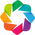

[Config] Bokeh and HoloViews activated.


C:\Users\gkp\OneDrive - Oak Ridge National Laboratory\Research\Data Analysis (python)\SPMpy_ORNL\SPMpyDataAnalysisFunctionLibrary_2025Dec04.py:1197: SyntaxWarning: invalid escape sequence '\{'
  print('z_LIX_fNb_xr', 'step_dx, step_dy = ', re.findall(r'\{([^}]+)', str(z_LIX_fNb_xr.dims)))
C:\Users\gkp\OneDrive - Oak Ridge National Laboratory\Research\Data Analysis (python)\SPMpy_ORNL\SPMpyDataAnalysisFunctionLibrary_2025Dec04.py:1318: SyntaxWarning: invalid escape sequence '\d'
  _NUM_PAT = re.compile(r'[-+]?(\d+(\.\d*)?|\.\d+)([eE][-+]?\d+)?')
C:\Users\gkp\OneDrive - Oak Ridge National Laboratory\Research\Data Analysis (python)\SPMpy_ORNL\SPMpyDataAnalysisFunctionLibrary_2025Dec04.py:2991: SyntaxWarning: invalid escape sequence '\O'
  File ~\OneDrive - Oak Ridge National Laboratory\Research\Data Analysis (python)\SPMpy_ORNL\SPMpyDataAnalysisFunctionLibrary_2025Oct23.py:2449


Loading BokehJS ...

Loading BokehJS ...

[Imported] SPMpyDataAnalysisFunctionLibrary_2025Dec04.

[Done] Environment setup complete.
Run your separate cell to manage 'seaborn-image'. If widgets/Plotly look stale, please restart the kernel.


In [1]:
# ==============================================================================
# SPMpy Environment Inspection & Auto-Setup (Single Jupyter Cell)
# Priority: mamba -> conda -> pip (conda-forge first)
#
# PURPOSE
# -------
# Inspect the current Jupyter environment and ensure that packages required by
# SPMpy and its visualization stack are present. If a package is missing, this
# cell attempts installation with the following priority:
#   1) mamba (if available)  2) conda (conda-forge)  3) pip fallback
#
# WHAT THIS CELL DOES (HIGH LEVEL)
# --------------------------------
# - Detects JupyterLab major version and handles minimal integration logic
#   (prebuilt widget renderers on Lab >= 4).
# - Ensures core scientific packages (NumPy, SciPy, Pandas, Xarray, scikit-image, etc.).
# - Ensures HoloViz stack (panel, holoviews, hvplot, jupyter-bokeh) and Plotly.
# - Installs PyQt strictly via conda-forge (pip is forbidden) to avoid Qt issues.
# - Leaves `seaborn-image` installation to a SEPARATE cell (by your request).
#
# OUTPUT
# ------
# Verbose logs indicating success/failure for each step. Non-fatal issues are
# reported as warnings so that analysis can continue where possible.
#
# IMPORTANT NOTES
# ---------------
# - If widgets or Plotly look stale after installation, please restart the kernel.
# - This cell is designed to be idempotent; re-running will be safe.
# - `seaborn-image` and any special compatibility steps are DELIBERATELY OMITTED
#   here; use your separate cell to manage it.
# ==============================================================================

import importlib
import subprocess
import sys
import shutil
from warnings import warn
from typing import Optional, Tuple

# ------------------------------------------------------------------------------
# Utility: Run shell commands
# ------------------------------------------------------------------------------

def run_raw(cmd: str) -> bool:
    """
    Execute a shell command as-is and return whether it succeeded.

    Parameters
    ----------
    cmd : str
        Full shell command to execute (no 'python -m' prefix added).

    Returns
    -------
    bool
        True if process returns exit code 0, False otherwise.

    Behavior
    --------
    - Captures stdout/stderr and prints them for traceability.
    - On failure, prints '[Command failed]' with stderr summary.
    """
    try:
        result = subprocess.run(
            cmd, shell=True, check=True,
            stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True
        )
        if result.stdout.strip():
            print(result.stdout.strip())
        return True
    except subprocess.CalledProcessError as e:
        print(f"[Command failed] {cmd}")
        if e.stderr:
            print(f"[Error] {e.stderr.strip()}")
        return False


def run_py_module(mod_and_args: str) -> bool:
    """
    Execute a Python module via 'python -m ...'.

    Parameters
    ----------
    mod_and_args : str
        Module and arguments, e.g. 'pip install ipywidgets>=8'.

    Returns
    -------
    bool
        True if successful, False otherwise.
    """
    return run_raw(f"{sys.executable} -m {mod_and_args}")

# ------------------------------------------------------------------------------
# Package manager detection (prefer mamba over conda)
# ------------------------------------------------------------------------------

def pick_pkg_manager() -> Tuple[Optional[str], Optional[str]]:
    """
    Detect available package managers.

    Returns
    -------
    (primary, fallback) : tuple[str|None, str|None]
        Primary is 'mamba' if present, else 'conda' if present, else None.
        Fallback is 'conda' only when primary is 'mamba'.
    """
    has_mamba = shutil.which("mamba") is not None
    has_conda = shutil.which("conda") is not None
    if has_mamba and has_conda:
        return ("mamba", "conda")
    if has_mamba:
        return ("mamba", None)
    if has_conda:
        return ("conda", None)
    return (None, None)

PKG_MGR, PKG_MGR_FALLBACK = pick_pkg_manager()
print(f"[Info] Package manager priority: {PKG_MGR or 'None'}"
      + (f" -> {PKG_MGR_FALLBACK}" if PKG_MGR_FALLBACK else ""))

# ------------------------------------------------------------------------------
# JupyterLab version detection (some integration paths depend on this)
# ------------------------------------------------------------------------------

def get_jupyterlab_major() -> Optional[int]:
    """
    Retrieve the JupyterLab major version (int), or None if unavailable.

    Why we need it
    --------------
    - JupyterLab >= 4 ships many prebuilt extensions (no Node build needed).
    - Older versions may require building labextensions.
    """
    try:
        out = subprocess.check_output(
            f"{sys.executable} -m jupyter lab --version", shell=True, text=True
        ).strip()
        return int(out.split(".")[0])
    except Exception:
        return None

JL_MAJOR = get_jupyterlab_major()
print(f"[Info] Detected JupyterLab major version: {JL_MAJOR}")

# ------------------------------------------------------------------------------
# Install/import helpers
# ------------------------------------------------------------------------------

def is_importable(module_name: str) -> bool:
    """
    Check whether a Python module can be imported without error.

    Parameters
    ----------
    module_name : str
        The import name, e.g. 'numpy' or 'jupyter_bokeh'.

    Returns
    -------
    bool
        True if import succeeds, False otherwise.
    """
    try:
        importlib.import_module(module_name)
        return True
    except ImportError:
        return False


def conda_install(spec: str) -> bool:
    """
    Attempt installation via mamba/conda using conda-forge.

    Parameters
    ----------
    spec : str
        Conda package spec (e.g. 'xarray' or 'pyqt').

    Returns
    -------
    bool
        True if installation succeeds, False otherwise.
    """
    if PKG_MGR:
        if run_raw(f'{PKG_MGR} install -y -c conda-forge {spec}'):
            return True
    if PKG_MGR_FALLBACK:
        if run_raw(f'{PKG_MGR_FALLBACK} install -y -c conda-forge {spec}'):
            return True
    return False


def pip_install(spec: str) -> bool:
    """
    Attempt installation via pip.

    Parameters
    ----------
    spec : str
        Pip package spec (e.g. 'kaleido' or 'ipywidgets>=8').

    Returns
    -------
    bool
        True if installation succeeds, False otherwise.
    """
    return run_py_module(f"pip install {spec}")


def smart_install(name: str,
                  import_name: Optional[str] = None,
                  prefer_conda: bool = True,
                  conda_spec: Optional[str] = None,
                  pip_spec: Optional[str] = None,
                  forbid_pip: bool = False) -> bool:
    """
    Ensure that a package is importable; install if missing.

    Parameters
    ----------
    name : str
        Human-friendly display name for logs.
    import_name : str | None
        The 'import' module path; defaults to `name` if None.
    prefer_conda : bool
        Try conda-forge first, then pip (unless forbid_pip=True).
    conda_spec : str | None
        Conda spec; defaults to `name` when None.
    pip_spec : str | None
        Pip spec; defaults to `name` when None.
    forbid_pip : bool
        If True, do not attempt pip fallback (e.g., for PyQt).

    Returns
    -------
    bool
        True if the package is importable after attempts, False otherwise.

    Behavior
    --------
    - This function is idempotent: if import is already available, it prints
      a short message and returns True without installing anything.
    """
    import_name = import_name or name
    conda_spec = conda_spec or name
    pip_spec = pip_spec or name

    if is_importable(import_name):
        print(f"[OK] {import_name} already importable.")
        return True

    print(f"[Installing] {name} ...")
    if prefer_conda:
        if conda_install(conda_spec) and is_importable(import_name):
            print(f"[Imported] {import_name} after conda install.")
            return True
        if not forbid_pip and pip_install(pip_spec) and is_importable(import_name):
            print(f"[Imported] {import_name} after pip install.")
            return True
    else:
        if not forbid_pip and pip_install(pip_spec) and is_importable(import_name):
            print(f"[Imported] {import_name} after pip install.")
            return True
        if conda_install(conda_spec) and is_importable(import_name):
            print(f"[Imported] {import_name} after conda install.")
            return True

    print(f"[Failed] Could not install {name}")
    return False

# ------------------------------------------------------------------------------
# Step 0) Remove legacy JupyterLab widget manager if present
# ------------------------------------------------------------------------------

print("[Step 0] Checking for legacy @jupyter-widgets/jupyterlab-manager ...")
try:
    listing = subprocess.run(
        "jupyter labextension list", shell=True,
        stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True
    )
    if "@jupyter-widgets/jupyterlab-manager" in listing.stdout:
        print("[Info] Legacy widget manager found. Uninstalling ...")
        run_raw("jupyter labextension uninstall @jupyter-widgets/jupyterlab-manager")
    else:
        print("[Info] No legacy widget manager detected.")
except Exception as e:
    print(f"[Skip] Could not list labextensions: {e}")

# ------------------------------------------------------------------------------
# Step 1) Ensure ipywidgets>=8 and jupyterlab_widgets
# ------------------------------------------------------------------------------

print("[Step 1] Ensuring ipywidgets>=8 and jupyterlab_widgets ...")
smart_install("ipywidgets", import_name="ipywidgets", prefer_conda=True, pip_spec="ipywidgets>=8")
smart_install("jupyterlab_widgets", import_name="jupyterlab_widgets", prefer_conda=True)

if JL_MAJOR and JL_MAJOR < 4:
    print("[Build] JupyterLab <4 detected. Rebuilding Lab ...")
    run_raw("jupyter lab build --dev-build=False --minimize=False")
else:
    print("[Info] JupyterLab >=4 detected: no lab build required.")

# ------------------------------------------------------------------------------
# Step 2) Plotly integration (version-aware)
# ------------------------------------------------------------------------------

def maybe_install_plotly_integration():
    """
    Ensure Plotly works within current JupyterLab:
    - JupyterLab >= 4: Plotly renderer is prebuilt; nothing to install.
    - JupyterLab 3.x: ipywidgets-based renderers work; no extra build needed.
    - Older Lab: install legacy jupyterlab-plotly and rebuild.
    """
    if JL_MAJOR is None:
        warn("Could not detect JupyterLab version; skipping Plotly integration.")
        return
    if JL_MAJOR >= 4:
        print(f"[Skip] JupyterLab {JL_MAJOR}: Plotly renderer is prebuilt.")
        return
    elif JL_MAJOR >= 3:
        print(f"[Info] JupyterLab {JL_MAJOR}: ipywidgets-based Plotly works.")
        return
    else:
        print("[Info] Very old JupyterLab detected; installing legacy extension.")
        run_py_module("pip install jupyterlab-plotly")
        run_raw("jupyter lab build --dev-build=False --minimize=False")

print("[Step 2] Plotly / JupyterLab integration check ...")
smart_install("plotly", import_name="plotly", prefer_conda=True)
maybe_install_plotly_integration()

# ------------------------------------------------------------------------------
# Step 3) Upgrade panel, holoviews, jupyter-bokeh
# ------------------------------------------------------------------------------

print("[Step 3] Upgrading panel, holoviews, jupyter-bokeh ...")
for spec in ["panel", "holoviews", "jupyter-bokeh"]:
    if not smart_install(spec, import_name=spec.replace("-", "_"), prefer_conda=True):
        # Some packages (e.g., jupyter-bokeh) may be pip-only on Windows/Py3.13
        run_py_module(f"pip install --upgrade {spec}")

# ------------------------------------------------------------------------------
# Step 4) Core scientific / SPM-related packages
#   - PyQt via conda-forge only (forbid pip) to avoid Qt plugin issues.
#   - NOTE: seaborn-image is intentionally excluded; manage it in your separate cell.
# ------------------------------------------------------------------------------

core_packages = [
    ("xarray",        "xarray",        "xarray",           "xarray",           False),
    ("numpy",         "numpy",         "numpy",            "numpy",            False),
    ("scipy",         "scipy",         "scipy",            "scipy",            False),
    ("pandas",        "pandas",        "pandas",           "pandas",           False),
    ("seaborn",       "seaborn",       "seaborn",          "seaborn",          False),
    ("scikit-image",  "skimage",       "scikit-image",     "scikit-image",     False),
    ("xrft",          "xrft",          "xrft",             "xrft",             False),
    ("holoviews",     "holoviews",     "holoviews",        "holoviews",        False),
    ("hvplot",        "hvplot",        "hvplot",           "hvplot",           False),
    ("gwyfile",       "gwyfile",       "gwyfile",          "gwyfile",          False),
    ("tqdm-joblib",   "tqdm_joblib",   None,               "tqdm-joblib",      False),
    ("netcdf4",       "netCDF4",       "netcdf4",          "netCDF4",          False),
    ("h5netcdf",      "h5netcdf",      "h5netcdf",         "h5netcdf",         False),
    ("python-pptx",   "pptx",          "python-pptx",      "python-pptx",      False),
    ("pyqt",          "PyQt5",         "pyqt",             None,               True),   # forbid pip
    ("joblib",        "joblib",        "joblib",           "joblib",           False),
    ("numba",         "numba",         "numba",            "numba",            False),
    ("dask",          "dask",          "dask",             "dask",             False),
    ("jupyter-bokeh", "jupyter_bokeh", "jupyter-bokeh",    "jupyter-bokeh",    False),
    ("umap-learn",    "umap",          "umap-learn",       "umap-learn",       False),
    ("scikit-optimize","skopt",        "scikit-optimize",  "scikit-optimize",  False),
    ("anywidget",     "anywidget",     "anywidget",        "anywidget",        False),
    ("ipywidgets",    "ipywidgets",    "ipywidgets",       "ipywidgets>=8",    False),
    ("lmfit",         "lmfit",         "lmfit",            "lmfit",            False),
    ("hyperopt",      "hyperopt",      "hyperopt",         "hyperopt",         False),
    ("kaleido",       "kaleido",       "kaleido",          "kaleido",          False),
]

print("[Step 4] Ensuring core Python packages ...")
for disp, mod, conda_spec, pip_spec, forbid_pip in core_packages:
    smart_install(
        name=disp, import_name=mod, prefer_conda=True,
        conda_spec=conda_spec or disp, pip_spec=pip_spec or disp,
        forbid_pip=forbid_pip
    )

# ------------------------------------------------------------------------------
# Step 5) Import additional analysis libraries and configure visualization
#   (No seaborn-image here by design)
# ------------------------------------------------------------------------------

print("[Step 5] Importing additional analysis libraries and configuring ...")

# PowerPoint automation library
from pptx import Presentation
from pptx.util import Inches, Pt

# PyQt note:
# Creating QApplication repeatedly in notebooks can cause issues; typically
# you should create it once in an interactive session if you need GUI dialogs.
try:
    from PyQt5.QtWidgets import QApplication, QFileDialog  # noqa: F401
except Exception as e:
    warn(f"PyQt5 import warning: {e}\nIf import fails, try: conda install -c conda-forge pyqt")

# Matplotlib utilities
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

# Panel/HoloViz stack
import panel as pn
from panel.interact import interact
import panel.widgets as pnw
import holoviews as hv

# Parallelization & performance helpers
from joblib import Parallel, delayed
from numba import jit

# Image utilities
from skimage.transform import resize

# Enable Bokeh output in the notebook and activate HoloViews 'bokeh' backend
from bokeh.io import output_notebook
output_notebook()
hv.extension('bokeh')
print("[Config] Bokeh and HoloViews activated.")

# ------------------------------------------------------------------------------
# Step 6) Import SPMpy analysis function library (if available in the path)
# ------------------------------------------------------------------------------

try:
    #from SPMpyDataAnalysisFunctionLibrary_2025May31 import *  # noqa: F401,F403
    #from SPMpyDataAnalysisFunctionLibrary_2025Sep18 import *  # noqa: F401,F403
    #from SPMpyDataAnalysisFunctionLibrary_2025Oct23 import *  # noqa: F401,F403
    from SPMpyDataAnalysisFunctionLibrary_2025Dec04 import *  # noqa: F401,F403

    
    print("[Imported] SPMpyDataAnalysisFunctionLibrary_2025Dec04.")
except Exception as e:
    warn("SPMpy function library import failed: "
         f"{e}\nMake sure the file is present in the working directory or on PYTHONPATH.")

print("\n[Done] Environment setup complete.")
print("Run your separate cell to manage 'seaborn-image'. If widgets/Plotly look stale, please restart the kernel.")
# ==============================================================================


#### INSTALL Revised Nanonispy 
* original nanonispy is not updated from 2021--> forked and updated by Jewook
    * changing ```np.float``` to ```float```
    * #!pip install /Users/gkp/Documents/GitHub/nanonispy

In [2]:
# ==============================================================================
# Install/Import nanonispy from LOCAL source (separate cell)
#
# WHY THIS IS A SEPARATE CELL
# ---------------------------
# - The in-house analysis code expects a patched/forked version of nanonispy.
# - Conda/conda-forge packages may be outdated or incompatible with your code.
# - Installing directly from a LOCAL path via pip ensures the exact code you maintain
#   is used (no surprises from upstream releases).
#
# WHY pip (not conda) HERE?
# -------------------------
# - pip supports direct local path installs (editable or non-editable).
# - Miniforge is still your base environment manager, but for LOCAL/FORK packages
#   pip is the right tool.
#
# NOTES
# -----
# - Set EDITABLE=True if you want live-edit behavior (`pip install -e`).
# - If none of the candidate paths exists, the cell will raise a clear error.
# ==============================================================================

import os
import sys
import subprocess
import warnings
from importlib import import_module

CANDIDATE_PATHS = [
    r"C:\Users\gkp\Documents\GitHub\nanonispy",
    r"C:\temp\nanonispy",
    r"/Users/gkp/Documents/GitHub/nanonispy",  # macOS example
]
EDITABLE = False  # set to True if you want `pip install -e <path>`

def pip_install_local(path: str, editable: bool = False) -> bool:
    """Install a local package via pip (editable optional) and return success."""
    args = [sys.executable, "-m", "pip", "install", "--upgrade"]
    if editable:
        args.append("-e")
    args.append(path)
    try:
        subprocess.run(args, check=True)
        return True
    except subprocess.CalledProcessError as e:
        print(f"[pip] Local install failed from: {path}")
        print(e)
        return False

def install_and_import_nanonispy():
    """Import nanonispy; if missing, install from one of the local paths."""
    try:
        nap = import_module("nanonispy")
        ver = getattr(nap, "__version__", "unknown")
        print(f"[OK] nanonispy already importable (version: {ver}).")
        return nap
    except ModuleNotFoundError:
        warnings.warn(
            "ModuleNotFoundError: 'nanonispy' not found. Attempting local installation."
        )

    for path in CANDIDATE_PATHS:
        if os.path.isdir(path):
            print(f"[Found] Local nanonispy path: {path}")
            if pip_install_local(path, editable=EDITABLE):
                try:
                    nap = import_module("nanonispy")
                    ver = getattr(nap, "__version__", "unknown")
                    print(f"[Installed] nanonispy from local path (version: {ver}).")
                    return nap
                except Exception as e:
                    print(f"[Import error after install from {path}] {e}")
                    # Try next path
            else:
                print(f"[Skip] Installation attempt from {path} failed. Trying next path...")

    raise ModuleNotFoundError(
        "Failed to install 'nanonispy' from local paths.\n"
        "Please verify the repository path(s) and try again."
    )

# Execute
_ = install_and_import_nanonispy()


[OK] nanonispy already importable (version: unknown).


#### install Seaborn Image seperately. 
* Jewook fork the git --> github desktop --> local folder  --> install. higher version 

* lower version seaborn image --> matlab error 


In [3]:
# ==============================================================================
# Upgrade matplotlib-scalebar, apply Matplotlib monkeypatch (if needed),
# and reinstall seaborn-image FROM LOCAL FORK (separate cell)
#
# WHY THIS IS A SEPARATE CELL
# ---------------------------
# - seaborn-image can be sensitive to Matplotlib internal API changes (>=3.10).
# - We first ensure matplotlib-scalebar is up-to-date (common dependency).
# - Then we provide compatibility shims (monkeypatch) for changed/removed symbols.
# - Finally, we reinstall seaborn-image from YOUR LOCAL FORK to guarantee the
#   exact fixes you maintain are used.
#
# WHY pip (not conda) HERE?
# -------------------------
# - You are installing from a LOCAL fork. pip supports path-based installs and
#   flags like --ignore-requires-python when you know compatibility constraints.
#
# ORDER MATTERS
# -------------
# 1) Upgrade scalebar   2) Apply monkeypatch   3) (Re)install seaborn-image fork
# ==============================================================================

import sys
import os
import subprocess
import importlib
import warnings

# 0) Optional: clean, explicit logging about the active Python environment
print(f"[Env] Python: {sys.executable}")

# 1) Upgrade matplotlib-scalebar to latest (mitigates known compatibility issues)
try:
    subprocess.run(
        [sys.executable, "-m", "pip", "install", "--upgrade", "matplotlib-scalebar"],
        check=True
    )
    import matplotlib_scalebar as mbs
    print(f"[OK] matplotlib-scalebar version: {getattr(mbs, '__version__', 'unknown')}")
except subprocess.CalledProcessError as e:
    warnings.warn(f"Failed to upgrade matplotlib-scalebar: {e}")

# 2) Apply runtime monkeypatches for Matplotlib when needed
#    - Some add-ons expect `matplotlib._all_deprecated` to exist.
#    - Some code may rely on `matplotlib.cm.register_cmap`, which changed in 3.10+.
import matplotlib as mpl

# 2a) Ensure mpl._all_deprecated exists
if not hasattr(mpl, "_all_deprecated"):
    mpl._all_deprecated = set()
    print("[Compat] Created mpl._all_deprecated = set()")
else:
    print("[Compat] mpl._all_deprecated already present")

# 2b) Ensure cm.register_cmap is available (map to new colormap registry if missing)
try:
    from matplotlib import cm
    try:
        from matplotlib import colormaps as _mpl_colormaps
    except Exception:
        _mpl_colormaps = None

    if not hasattr(cm, "register_cmap") and _mpl_colormaps is not None:
        def _register_cmap(name=None, cmap=None, **kwargs):
            return _mpl_colormaps.register(cmap=cmap, name=name, **kwargs)
        cm.register_cmap = _register_cmap  # type: ignore[attr-defined]
        print("[Compat] Injected cm.register_cmap shim via matplotlib.colormaps")
    else:
        print("[Compat] cm.register_cmap is available")
except Exception as e:
    warnings.warn(f"Could not prepare register_cmap shim: {e}")

# 3) Reinstall seaborn-image from local fork if missing or older than threshold
from importlib import metadata
from packaging.version import Version, InvalidVersion

LOCAL_SEABORN_IMAGE_PATH = r"C:\Users\gkp\Documents\GitHub\seaborn-image"
MIN_VERSION = Version("0.10.0")  # threshold for reinstall; adjust to your fork policy

def get_installed_version(dist_name: str) -> Version | None:
    """Return installed version of a distribution or None if not installed."""
    try:
        return Version(metadata.version(dist_name))
    except metadata.PackageNotFoundError:
        return None
    except InvalidVersion:
        return None

need_install = False
current_ver = get_installed_version("seaborn-image")

if current_ver is None:
    print("[Info] seaborn-image not installed; scheduling local fork installation.")
    need_install = True
else:
    print(f"[Info] Current seaborn-image version: {current_ver}")
    if current_ver < MIN_VERSION:
        print(f"[Info] Version < {MIN_VERSION}; scheduling local fork reinstall.")
        need_install = True

if need_install:
    # 3a) Uninstall any existing seaborn-image cleanly
    subprocess.run([sys.executable, "-m", "pip", "uninstall", "-y", "seaborn-image"], check=False)
    print("[Info] Uninstalled existing seaborn-image (if present).")

    # 3b) Install from local fork path, ignoring Python version pins if needed
    if not os.path.isdir(LOCAL_SEABORN_IMAGE_PATH):
        raise FileNotFoundError(
            f"Local seaborn-image fork not found at: {LOCAL_SEABORN_IMAGE_PATH}\n"
            f"Please clone or correct the path."
        )
    subprocess.run(
        [
            sys.executable, "-m", "pip", "install", "--upgrade",
            "--ignore-requires-python", LOCAL_SEABORN_IMAGE_PATH
        ],
        check=True
    )
    # 3c) Verify final import and version
    isns = importlib.reload(importlib.import_module("seaborn_image"))
    final_ver = getattr(isns, "__version__", "unknown")
    print(f"[OK] seaborn-image reinstalled from local fork (version: {final_ver})")
else:
    print("[Info] seaborn-image is recent enough; no installation action required.")


[Env] Python: C:\Users\gkp\AppData\Local\miniforge3\envs\DataAnalysis\python.exe
[OK] matplotlib-scalebar version: 0.9.0
[Compat] Created mpl._all_deprecated = set()
[Compat] Injected cm.register_cmap shim via matplotlib.colormaps
[Info] Current seaborn-image version: 0.10.0
[Info] seaborn-image is recent enough; no installation action required.


#### memory usage checkup

In [4]:
import psutil
import os
import platform  # For detecting the operating system

# Get memory usage of the current Python process
process = psutil.Process(os.getpid())
memory_info = process.memory_info()

# Retrieve the operating system name
os_name = platform.system()

# Display memory usage information
print(f"RSS: {memory_info.rss / 1024 ** 2:.2f} MB")  # Resident Set Size (actual memory usage)
print(f"VMS: {memory_info.vms / 1024 ** 2:.2f} MB")  # Virtual Memory Size (total reserved memory)

# Add OS-specific explanations
if os_name == "Darwin":  # macOS
    print("Note: On macOS, VMS includes large reserved virtual memory that is not actually used.")
elif os_name == "Windows":
    print("Note: On Windows, VMS reflects the total virtual memory requested by the process.")
else:
    print("Note: VMS interpretation may vary depending on the operating system.")

RSS: 493.43 MB
VMS: 412.33 MB
Note: On Windows, VMS reflects the total virtual memory requested by the process.


#### check Pytorch & scikit learn  installation in the system 


In [5]:
#!/usr/bin/env python3
"""
Miniforge-first setup for PyTorch + torchvision (+ sklearn/umap/hdbscan),
with a hard solver timeout and an immediate pip path on Windows+Py3.13.

Key behaviors
-------------
- If Windows and Python >= 3.13: SKIP conda/mamba and install from official pip wheels.
- Else: Try mamba > conda with strict channels and a hard timeout, then pip fallback.
- Streams pip output so the user can see progress.
- Prints final environment summary and simple torch sanity checks.

Why skip conda on Win+Py3.13?
-----------------------------
Conda builds for this combo can lag. Solvers spend minutes searching/downgrading
attempts. Using official pip wheels is typically the fastest, most reliable path.
"""

import argparse
import os
import platform
import shutil
import subprocess
import sys
import time
from typing import List, Optional, Tuple

# ---------------------------------------------------------------------
# Global settings
# ---------------------------------------------------------------------
SOLVE_TIMEOUT = 180  # seconds: hard time limit for conda/mamba solver

# ---------------------------------------------------------------------
# Utils
# ---------------------------------------------------------------------
def get_os_type() -> str:
    """Return 'Mac', 'Windows', or 'Unsupported OS'."""
    name = platform.system()
    if name == "Darwin":
        return "Mac"
    if name == "Windows":
        return "Windows"
    return "Unsupported OS"


def in_conda_env() -> bool:
    """True if running inside an activated conda/mamba environment."""
    return bool(os.environ.get("CONDA_PREFIX"))


def check_importable(mod_name: str) -> bool:
    """True if module can be imported."""
    try:
        __import__(mod_name)
        return True
    except Exception:
        return False


def get_module_version(mod_name: str) -> Optional[str]:
    """Safely get module.__version__ or None."""
    try:
        mod = __import__(mod_name)
        return getattr(mod, "__version__", "unknown")
    except Exception:
        return None


def run_capture_cmdline(cmdline: str, timeout: Optional[int] = None) -> Tuple[int, str, str]:
    """
    Run a shell command (Windows-friendly), capture stdout/stderr, support timeout.

    Returns
    -------
    (returncode, stdout, stderr)
    """
    try:
        proc = subprocess.run(
            cmdline,
            shell=True,
            check=False,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True,
            timeout=timeout
        )
        return proc.returncode, proc.stdout, proc.stderr
    except subprocess.TimeoutExpired:
        return 124, "", "[Timeout] Command exceeded the allotted time."


def run_stream_cmdline(cmdline: str, banner: Optional[str] = None) -> Tuple[int, str]:
    """
    Stream a long-running command's combined output live (useful for pip installs).

    Returns
    -------
    (returncode, tail_of_output)
    """
    if banner:
        print(banner)
    print(f"[Cmd] {cmdline}")

    proc = subprocess.Popen(
        cmdline,
        shell=True,
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT,
        text=True,
        bufsize=1,
        universal_newlines=True,
    )

    last_lines: List[str] = []
    assert proc.stdout is not None
    for line in proc.stdout:
        print(line.rstrip())
        last_lines.append(line.rstrip())
        if len(last_lines) > 12:
            last_lines.pop(0)

    proc.wait()
    return proc.returncode, "\n".join(last_lines)


def pick_pkg_manager() -> Tuple[Optional[str], Optional[str]]:
    """Prefer mamba > conda. Return (primary, fallback)."""
    has_mamba = shutil.which("mamba") is not None
    has_conda = shutil.which("conda") is not None
    if has_mamba and has_conda:
        return "mamba", "conda"
    if has_mamba:
        return "mamba", None
    if has_conda:
        return "conda", None
    return None, None


PKG_MGR, PKG_MGR_FALLBACK = pick_pkg_manager()


def conda_install(
    pkgs: List[str],
    channels: List[str],
    extra_args: Optional[List[str]] = None,
    solve_timeout: int = SOLVE_TIMEOUT
) -> bool:
    """
    Install packages using mamba/conda with strict channel priority and a hard timeout.

    Notes
    -----
    - Adds '--override-channels' and '--strict-channel-priority' to reduce solver search.
    - Use this ONLY when we are not on Windows+Py3.13 (where we skip conda).
    """
    if PKG_MGR is None and PKG_MGR_FALLBACK is None:
        print("[Error] Neither mamba nor conda is available on PATH.")
        return False

    def build_cmd(tool: str) -> str:
        parts: List[str] = [
            tool, "install", "-y",
            "--override-channels", "--strict-channel-priority"
        ]
        if extra_args:
            parts += extra_args
        for ch in channels:
            parts += ["-c", ch]
        parts += pkgs
        return " ".join(parts)

    tool = PKG_MGR or PKG_MGR_FALLBACK
    print(f"[Install] via {tool} (channels: {', '.join(channels)})")
    rc, out, err = run_capture_cmdline(build_cmd(tool), timeout=solve_timeout)
    if rc == 0:
        print(f"[OK] {' '.join(pkgs)} installed via {tool}")
        return True
    if rc == 124:
        print(f"[Timeout] {tool} exceeded {solve_timeout}s while solving.")
    else:
        print(f"[Error] {tool} failed:\n{(err or out).strip()}")

    if PKG_MGR and PKG_MGR_FALLBACK and PKG_MGR == "mamba":
        tool_fb = PKG_MGR_FALLBACK
        print(f"[Fallback] Trying {tool_fb} ...")
        rc2, out2, err2 = run_capture_cmdline(build_cmd(tool_fb), timeout=solve_timeout)
        if rc2 == 0:
            print(f"[OK] {' '.join(pkgs)} installed via {tool_fb}")
            return True
        if rc2 == 124:
            print(f"[Timeout] {tool_fb} exceeded {solve_timeout}s while solving.")
        else:
            print(f"[Error] {tool_fb} failed:\n{(err2 or out2).strip()}")

    return False


def print_environment(os_type: str) -> None:
    """Print a concise environment summary."""
    print("========== Environment Summary ==========")
    print(f"OS              : {os_type}")
    if os_type == "Mac":
        print(f"macOS           : {platform.mac_ver()[0]}")
    elif os_type == "Windows":
        print(f"Windows         : {platform.version()}")
    print(f"Python          : {sys.version.split()[0]}")
    print(f"Conda env active: {'Yes' if in_conda_env() else 'No'}")
    print(f"Pkg manager     : {PKG_MGR or 'None'}"
          f"{' (fallback: ' + PKG_MGR_FALLBACK + ')' if PKG_MGR_FALLBACK else ''}")
    for mod in ("torch", "torchvision", "sklearn", "umap", "hdbscan"):
        ok = check_importable(mod)
        ver = get_module_version(mod) if ok else None
        print(f"{mod:12s}: {'Installed' if ok else 'Not Installed'}"
              f"{' (v' + ver + ')' if ver else ''}")
    if os_type == "Mac" and check_importable("torch"):
        import torch
        print(f"PyTorch MPS     : {'Available' if torch.backends.mps.is_available() else 'Not Available'}")
    print("=========================================\n")


# ---------------------------------------------------------------------
# Install logic with Windows+Py3.13 fast-path and pip fallback
# ---------------------------------------------------------------------
def pip_install_torch(use_gpu: bool, os_type: str) -> None:
    """
    Install torch/torchvision from official PyTorch pip wheels (CPU or CUDA).

    - Windows + --gpu: use cu124 index.
    - macOS: CPU/MPS wheels from default/CPU index.
    """
    index_url = "https://download.pytorch.org/whl/cpu"
    if use_gpu and os_type == "Windows":
        index_url = "https://download.pytorch.org/whl/cu124"
        print("[Info] Using CUDA wheels (cu124) via pip.")
    elif os_type == "Mac":
        print("[Info] macOS will use CPU/MPS wheels (no CUDA).")

    rc, _ = run_stream_cmdline(f"{sys.executable} -m pip install --upgrade pip", banner="[pip] Upgrade pip")
    if rc != 0:
        raise RuntimeError("Failed to upgrade pip.")

    rc, _ = run_stream_cmdline(
        f"{sys.executable} -m pip install --upgrade torch torchvision --index-url {index_url}",
        banner="[pip] Installing torch + torchvision"
    )
    if rc != 0:
        raise RuntimeError("pip installation of torch/torchvision failed.")

    print("[OK] Installed PyTorch/torchvision via pip.")


def install_pytorch_and_vision(use_gpu: bool, os_type: str) -> None:
    """
    Decide path:
    - On Windows with Python >= 3.13: skip conda/mamba and use pip immediately.
    - Else: try conda/mamba with strict channels and timeout, then pip fallback.
    """
    print("[Step] Installing/Upgrading PyTorch + torchvision ...")

    py_major, py_minor = map(int, sys.version.split()[0].split(".")[:2])
    if os_type == "Windows" and (py_major, py_minor) >= (3, 13):
        print("[Fast-path] Windows + Python >= 3.13 detected. Skipping conda/mamba and using pip wheels.")
        pip_install_torch(use_gpu=use_gpu, os_type=os_type)
        return

    # Conda/mamba first for other OS/Python combos
    channels = ["pytorch", "conda-forge"]          # official PyTorch channel first
    pkgs = ["pytorch", "torchvision"]

    start = time.time()
    ok = conda_install(pkgs, channels, extra_args=None, solve_timeout=SOLVE_TIMEOUT)
    elapsed = time.time() - start

    if ok:
        print(f"[OK] Installed via conda/mamba in {elapsed:,.1f}s")
        return

    # Fallback to pip
    print(f"[Warn] conda/mamba install failed or timed out in {elapsed:,.1f}s. Falling back to pip wheels.")
    pip_install_torch(use_gpu=use_gpu, os_type=os_type)


def install_extras(force_reinstall: bool) -> None:
    """
    Install scikit-learn, umap-learn, hdbscan from conda-forge (conda-first).
    """
    print("[Step] Installing extras: scikit-learn, umap-learn, hdbscan ...")
    to_install: List[str] = []

    def need(mod: str) -> bool:
        return force_reinstall or not check_importable(mod)

    if need("sklearn"):
        to_install.append("scikit-learn")
    if need("umap"):
        to_install.append("umap-learn")
    if need("hdbscan"):
        to_install.append("hdbscan")

    if to_install:
        ok = conda_install(
            to_install,
            ["conda-forge"],
            extra_args=None,
            solve_timeout=SOLVE_TIMEOUT
        )
        if not ok:
            raise RuntimeError(f"Failed to install: {', '.join(to_install)}")
    else:
        print("[Info] All extras already installed; skipping.")


# ---------------------------------------------------------------------
# CLI
# ---------------------------------------------------------------------
def build_parser() -> argparse.ArgumentParser:
    """Build CLI parser."""
    p = argparse.ArgumentParser(
        description="Miniforge-first setup for PyTorch/torchvision + sklearn/umap/hdbscan, with pip fallback."
    )
    p.add_argument("--force", action="store_true",
                   help="Force reinstall of extras (sklearn/umap/hdbscan).")
    p.add_argument("--gpu", action="store_true",
                   help="Attempt CUDA-enabled PyTorch on Windows; macOS uses MPS automatically.")
    p.add_argument("--timeout", type=int, default=SOLVE_TIMEOUT,
                   help="Conda/mamba solver timeout (seconds) before pip fallback.")
    return p


def main(argv: Optional[List[str]] = None) -> None:
    """
    Entry point. In notebooks, unknown args like '-f <kernel.json>' are ignored.
    """
    parser = build_parser()
    if argv is None:
        argv = sys.argv[1:]
    args, _unknown = parser.parse_known_args(argv)

    global SOLVE_TIMEOUT
    SOLVE_TIMEOUT = int(args.timeout)

    os_type = get_os_type()
    if os_type == "Unsupported OS":
        print("[Fatal] Only macOS and Windows are supported.")
        sys.exit(1)

    print("[Step] Environment check\n")
    print_environment(os_type)

    if not in_conda_env():
        print("[Warning] No active conda environment detected.\n"
              "          Please 'conda activate <your-env>' (e.g., DataAnalysis) and re-run if needed.\n")

    try:
        install_pytorch_and_vision(use_gpu=args.gpu, os_type=os_type)
        install_extras(force_reinstall=args.force)
    except RuntimeError as e:
        print(f"[Fatal] {e}")
        sys.exit(1)

    print("\n[Step] Final summary\n")
    print_environment(os_type)

    # Minimal torch sanity check (if installed)
    if check_importable("torch"):
        import torch
        print(f"[Sanity] torch.__version__ = {torch.__version__}")
        if os_type == "Windows":
            print(f"[Sanity] CUDA available: {torch.cuda.is_available()}")
        elif os_type == "Mac":
            print(f"[Sanity] MPS available : {torch.backends.mps.is_available()}")
    print("Process complete.")


if __name__ == "__main__":
    # In Jupyter, avoid parsing the kernel's '-f <path>' arg by passing empty argv.
    if "ipykernel" in sys.modules:
        main([])  # behave as if no CLI args were provided
    else:
      main()

[Step] Environment check

========== Environment Summary ==========
OS              : Windows
Windows         : 10.0.26100
Python          : 3.13.5
Conda env active: Yes
Pkg manager     : mamba (fallback: conda)
torch       : Installed (v2.9.1+cpu)
torchvision : Installed (v0.24.1+cpu)
sklearn     : Installed (v1.7.1)
umap        : Installed (v0.5.9.post2)
hdbscan     : Installed (vunknown)

[Step] Installing/Upgrading PyTorch + torchvision ...
[Fast-path] Windows + Python >= 3.13 detected. Skipping conda/mamba and using pip wheels.
[pip] Upgrade pip
[Cmd] C:\Users\gkp\AppData\Local\miniforge3\envs\DataAnalysis\python.exe -m pip install --upgrade pip
[pip] Installing torch + torchvision
[Cmd] C:\Users\gkp\AppData\Local\miniforge3\envs\DataAnalysis\python.exe -m pip install --upgrade torch torchvision --index-url https://download.pytorch.org/whl/cpu
Looking in indexes: https://download.pytorch.org/whl/cpu
[OK] Installed PyTorch/torchvision via pip.
[Step] Installing extras: scikit-learn

<a id="data-loading"></a>

# Data Loading & management
## DataSet loading 

>  <font color= orange > Choose Folder & Raw Data for analysis</font>
> * use the file chooser & Choose Data folder
> * Once data folder is defined, use the'folder path'

[Back to Top](#top)

### Select working folder 

In [6]:
# ### reselect working folder 
from PyQt5.QtWidgets import QApplication, QFileDialog
import sys

def select_folder():
    # Check if QApplication instance already exists
    app = QApplication.instance()
    
    # If no instance exists, create one
    if app is None:
        app = QApplication(sys.argv)
    
    # Create the file dialog to select a folder
    file_dialog = QFileDialog()
    folder_path = file_dialog.getExistingDirectory(None, "Select Folder")
    
    return folder_path

# Call the function to select a folder
selected_folder = select_folder()
if selected_folder:
    print(f"Selected folder: {selected_folder}")
else:
    print("No folder selected.")

Selected folder: C:/Users/gkp/OneDrive - Oak Ridge National Laboratory/0_mK STM DATA/2024/20240518 mK FeTe0.55Se0.45PtIr21_Jewook


In [7]:
folder_path = selected_folder
print(f"Selected folder: {folder_path}")

Selected folder: C:/Users/gkp/OneDrive - Oak Ridge National Laboratory/0_mK STM DATA/2024/20240518 mK FeTe0.55Se0.45PtIr21_Jewook


In [8]:
files_df = files_in_folder(folder_path)
files_df

Current Path = C:\Users\gkp\OneDrive - Oak Ridge National Laboratory\Research\Data Analysis (python)\SPMpy_ORNL
Changed Path = C:\Users\gkp\OneDrive - Oak Ridge National Laboratory\0_mK STM DATA\2024\20240518 mK FeTe0.55Se0.45PtIr21_Jewook
sxm file groups: FeTe0.55Se0.45_PtIr21_Rocovery_800mK(X1)_0T_20240526_R30_20 : # of files = 1
sxm file groups: Grid Spectroscopy(X0.01)_2T_40mK_003-Sli : # of files = 1
sxm file groups: FeTe0.55Se0.45_PtIr21_40mK(X0.01)_0T_20240518_R30_10 : # of files = 1
sxm file groups: FeTe0.55Se0.45_PtIr21_40mK(X0.01)_0T_20240519_R00_10 : # of files = 1
sxm file groups: Grid Spectroscopy(X0.01)_2T_40mK_004_t : # of files = 1
sxm file groups: Grid Spectroscopy(X0.01)_0T_40mK_001-Sli : # of files = 1
sxm file groups: FeTe0.55Se0.45_PtIr21_40mK(X0.01)_2T_20240519_R00_10 : # of files = 2
sxm file groups: Grid Spectroscopy(X0.01)_2T_40mK_003_t : # of files = 1
sxm file groups: Grid Spectroscopy(X0.01)_4T_40mK_007-Sli : # of files = 1
sxm file groups: FeTe0.55Se0.45_Pt

,group,num,file_name,type
0,FeTe0.55Se0.45_PtIr21_40mK(X0.01)_0T_20240518_...,001,FeTe0.55Se0.45_PtIr21_40mK(X0.01)_0T_20240518_...,sxm
1,FeTe0.55Se0.45_PtIr21_40mK(X0.01)_0T_20240518_...,002,FeTe0.55Se0.45_PtIr21_40mK(X0.01)_0T_20240518_...,sxm
2,FeTe0.55Se0.45_PtIr21_40mK(X0.01)_0T_20240519_...,001,FeTe0.55Se0.45_PtIr21_40mK(X0.01)_0T_20240519_...,sxm
3,FeTe0.55Se0.45_PtIr21_40mK(X0.01)_2T_20240519_...,003,FeTe0.55Se0.45_PtIr21_40mK(X0.01)_2T_20240519_...,sxm
4,FeTe0.55Se0.45_PtIr21_40mK(X0.01)_2T_20240519_...,004,FeTe0.55Se0.45_PtIr21_40mK(X0.01)_2T_20240519_...,sxm
...,...,...,...,...
117,result_dataset_,NaN,result_dataset_4T010.nc,nc
118,result_dataset_4,NaN,result_dataset_4T_006.nc,nc
119,result_dataset_4,NaN,result_dataset_4T_007.nc,nc
120,result_dataset_4,NaN,result_dataset_4T_009.nc,nc


# Experimentsal Conditions 
* <font color= Black, font size="4" > **Data Acquistion date**  </font> :  : 2024 May
*  <font color= Black, font size="4" > **Sample**  </font> : 
    * <font color= White, font size="3" > $FeTe_{0.55}Se_{0.45}$  </font>
    * <font color= White, font size="3" > LT cleaved  </font>
*  <font color= Black, font size="4" > **Tip**  </font> : PtIr normal metal tip (#32), Cu(111) surface states checked
*  <font color= Black, font size="4" > **Temperature**  </font>   :   **40mK**
*  <font color= Black, font size="4" > **Magnetic field**  </font>  **2T (Z)**